In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Импорты

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

import warnings

warnings.filterwarnings('ignore')

In [ ]:
path = '/content/drive/MyDrive/Хакатон_2/Проектный практикум (хакатон)/'

In [ ]:
FILE_PATH = path + 'dataframe_for_EDA.csv'

 # Вспомогательные функции

#### Функция для получения списка атрибутов по категориям

In [ ]:
def get_columns_by_name(data, name):
    lst = []
    for column in data.columns:
        if name in column:
            lst.append(column)
    return lst

#### Функция мапинга

In [ ]:
def map_column(src, mapping):
    return mapping.get(str(src).lower(), "other") if isinstance(src, str) else "other"

#### Функция для кодировки топ-N

In [ ]:
def top_encoder(series, top_n=10, is_hash=False):
    top_categories = series.value_counts().head(top_n).index.tolist()

    if is_hash:
        # Категории кодируются числами
        mapping = {cat: idx for idx, cat in enumerate(top_categories)}
        mapping["other"] = top_n

        encoded_series = series.apply(lambda x: mapping.get(x, top_n))
    else:
        # Категории остаются строками, остальные заменяются на "other"
        top_set = set(top_categories)
        encoded_series = series.apply(lambda x: x if x in top_set else "other")

    return encoded_series

#### Функция для построения столбчатой диаграммы топ N признаков plot_top_attributes

In [ ]:
def plot_top_attributes(df, column, top_n=10, figsize=(10, 6), title=None):
    value_counts = df[column].value_counts(dropna=False).head(top_n)
    # Преобразуем NaN в строку 'NaN' для отображения на графике
    value_counts.index = value_counts.index.where(value_counts.index.notnull(), 'NaN')

    plt.figure(figsize=figsize)
    sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")
    plt.xticks(rotation=45)
    plt.title(title or f"Топ-{top_n} по '{column}'")
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

#### Функция для построения столбчатой диаграммы распределения по целевой переменной target для топ-10 значений для каждого из признаков

In [ ]:
def plot_top_categories_by_target(df, category_col, target_col='target', top_n=10, nan_label='NaN', figsize=(10, 6)):
    # Получаем топ значения с учетом NaN
    value_counts = df[category_col].fillna(nan_label).value_counts().head(top_n)
    top_cats = value_counts.index.tolist()

    # Для графика подменяем (только для построения!) пропуски на nan_label
    plt.figure(figsize=figsize)
    sns.countplot(
        data=df.assign(**{category_col: df[category_col].fillna(nan_label)}),
        x=category_col,
        hue=target_col,
        order=top_cats,
        width=0.8
    )
    plt.title(f"Распределение {target_col} по топ-{top_n} значениям {category_col} (с NaN)")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Загрузка файла

In [ ]:
# Загрузка файлов
df = pd.read_csv(FILE_PATH, index_col=0)

In [ ]:
# Проверка дубликатов
df.duplicated().sum()


np.int64(0)

In [ ]:
df.shape

(1269694, 17)

In [ ]:
df

,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,target
0,2021-10-16,14:00:00,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,NaN,mobile,NaN,Meizu,NaN,360x720,YaBrowser,Russia,Moscow,0
1,2021-05-25,10:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,NaN,375x667,Safari,Russia,Moscow,0
2,2021-10-06,08:00:00,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,NaN,mobile,NaN,Huawei,NaN,360x760,YaBrowser,Russia,Saint Petersburg,0
3,2021-09-07,14:00:00,1,PlbkrSYoHuZBWfYjYnfw,cpm,FTjNLDyTrXaWYgZymFkV,TuyPWsGQruPMpKvRxeBF,NaN,desktop,NaN,NaN,NaN,2560x1400,Chrome,Russia,Moscow,0
4,2021-06-09,21:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,NaN,384x854,Samsung Internet,Russia,Surgut,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269689,2021-09-07,11:00:00,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,PkybGvWbaqORmxjNunqZ,NaN,mobile,NaN,Xiaomi,NaN,393x851,Chrome,Russia,Moscow,1
1269690,2021-05-25,18:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,desktop,NaN,NaN,NaN,1920x1080,YaBrowser,Russia,Moscow,1
1269691,2021-06-15,15:00:00,1,bByPQxmDaMXgpHeypKSM,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,desktop,NaN,NaN,NaN,1440x900,Chrome,Russia,Moscow,1
1269692,2021-10-03,12:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Xiaomi,NaN,393x851,Chrome,Russia,Volgodonsk,1


In [ ]:
# Количество строк с отсутствующими значениями
(df.isnull().mean()*100).round(3)


,0
visit_date,0.000
visit_time,0.000
visit_number,0.000
utm_source,0.001
utm_medium,0.000
utm_campaign,8.276
utm_adcontent,13.708
utm_keyword,52.341
device_category,0.000
device_os,51.504


### Анализ целевого признака

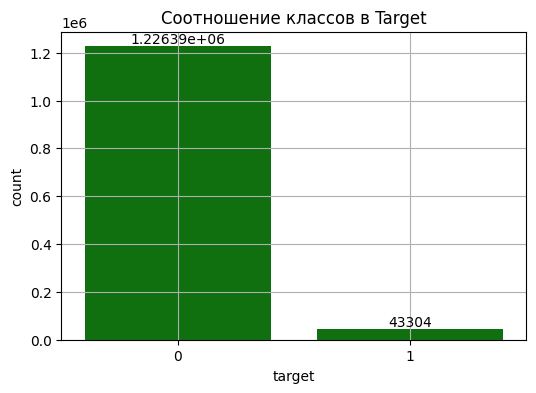

In [ ]:
# График соотношения классов в target
classes = df['target'].value_counts().reset_index()
fig = plt.figure(figsize=(6, 4))
cl = sns.barplot(classes, x='target', y='count', color='green')
cl.bar_label(cl.containers[0])
cl.set_title('Соотношение классов в Target')
cl.grid()

# EDA

Для кодирования признаков примялась техника Label encoding —  преобразование категориальных (нечисловых) признаков в числовые с помощью замены каждого уникального категориального значения на уникальное число.

In [ ]:
# Список признаков для удаления
column_drop_list = []

### Обработка данных utm

In [ ]:
utm_column_list = get_columns_by_name(df, 'utm')
utm_column_list

['utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent', 'utm_keyword']

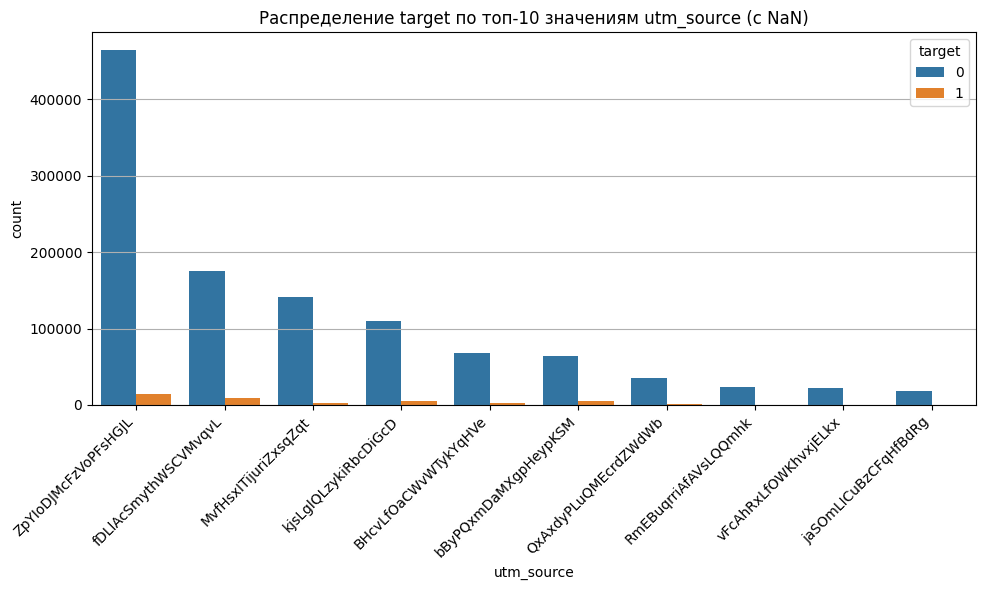

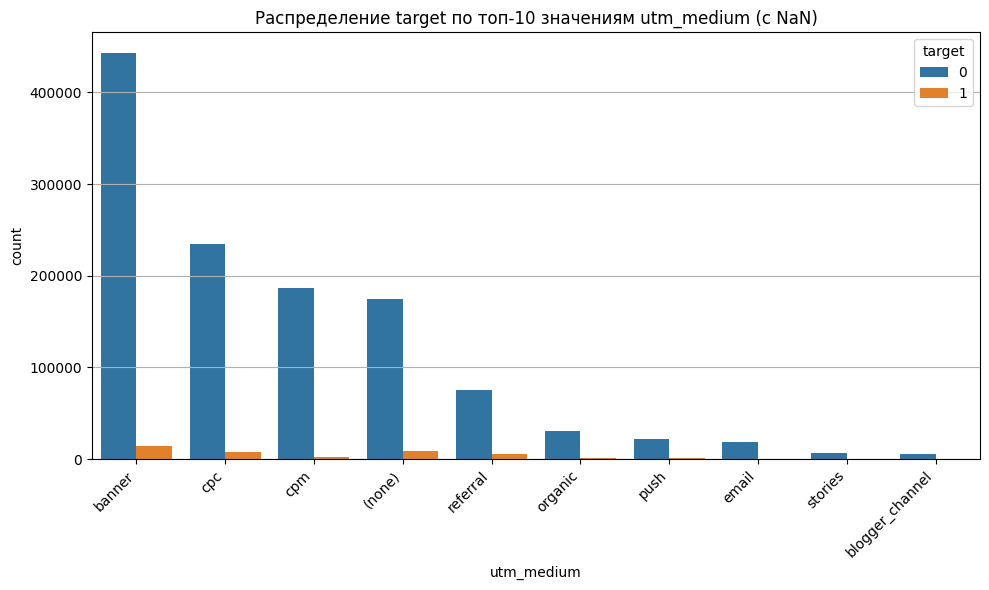

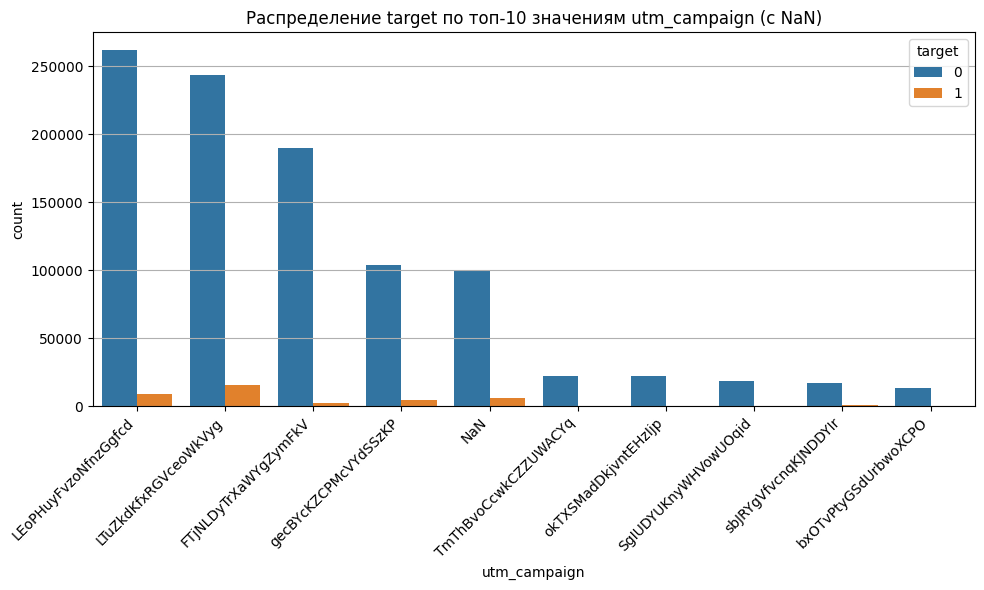

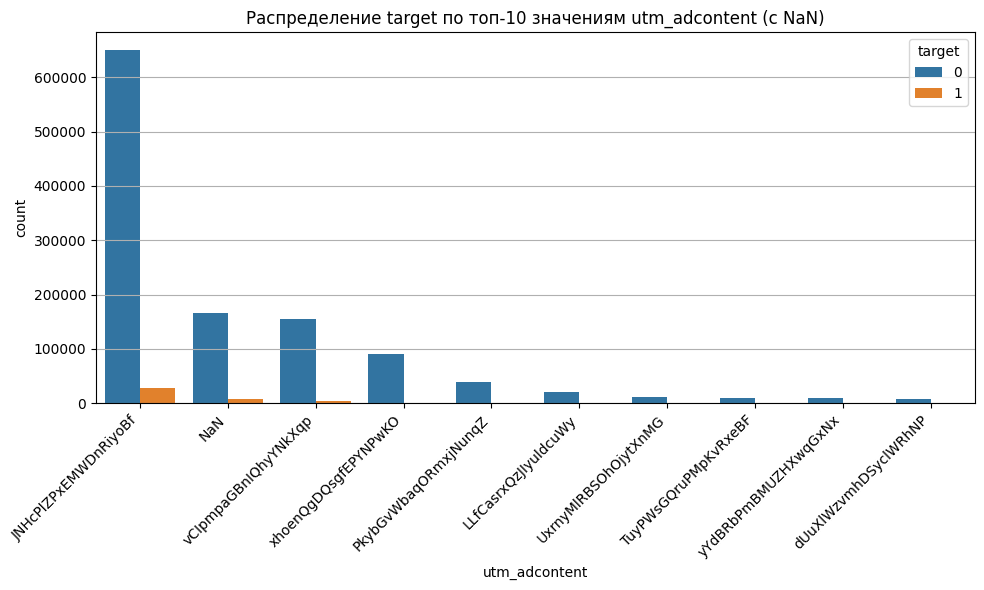

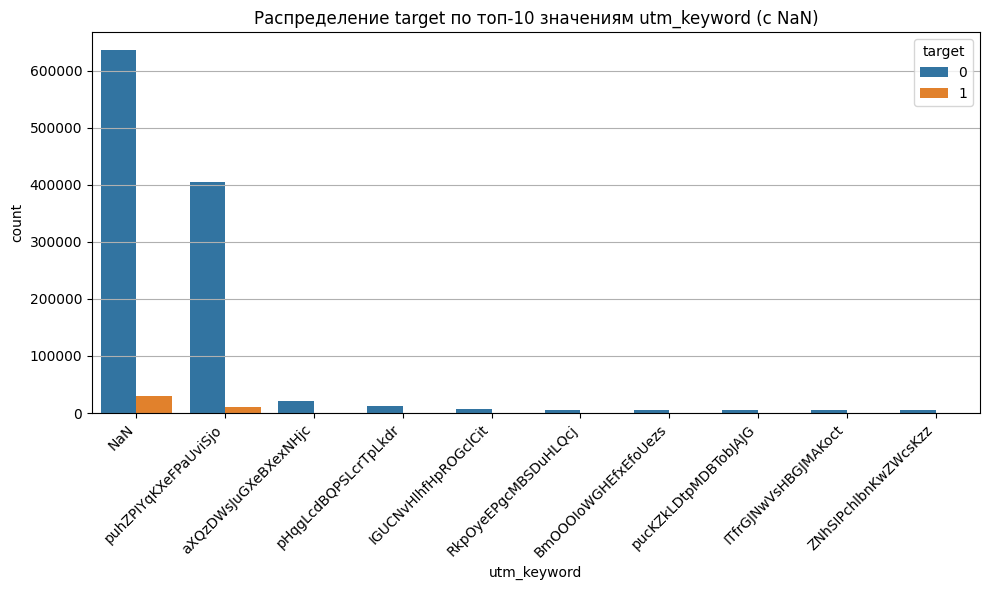

In [ ]:
for column in utm_column_list:
  plot_top_categories_by_target(df, column, figsize=(10, 6))

#### utm_medium - тип привлечения

In [ ]:
utm_medium_mapping = {
    # Organic
    "organic": "organic",
    "(none)": "organic",
    "referral": "organic",

    # CPC
    "cpc": "paid_cpc",
    "yandex_cpc": "paid_cpc",
    "google_cpc": "paid_cpc",

    # CPM
    "cpm": "paid_cpm",
    "CPM": "paid_cpm",

    # Email
    "email": "email",
    "outlook": "email",

    # Social / SMM
    "push": "social",
    "smm": "social",
    "stories": "social",
    "post": "social",
    "blogger_channel": "social",
    "blogger_stories": "social",
    "blogger_header": "social",
    "tg": "social",
    "fb_smm": "social",
    "vk_smm": "social",
    "ok_smm": "social",
    "app": "social",
    "static": "social",

    # Partner/Promo
    "smartbanner": "partner",
    "partner": "partner",
    "promo_sber": "partner",
    "promo_sbol": "partner",
    "landing": "partner",
    "landing_interests": "partner",
    "link": "partner",
    "web_polka": "partner",
    "main_polka": "partner",
    "tablet": "partner",
    "desktop": "partner",
    "Sbol_catalog": "partner",
    "catalogue": "partner",
    "dom_click": "partner",

    # QR, rare
    "qr": "qr",
    "qrcodevideo": "qr"
}

In [ ]:
df["utm_medium_grouped"] = df["utm_medium"].apply(lambda x: map_column(x, utm_medium_mapping))

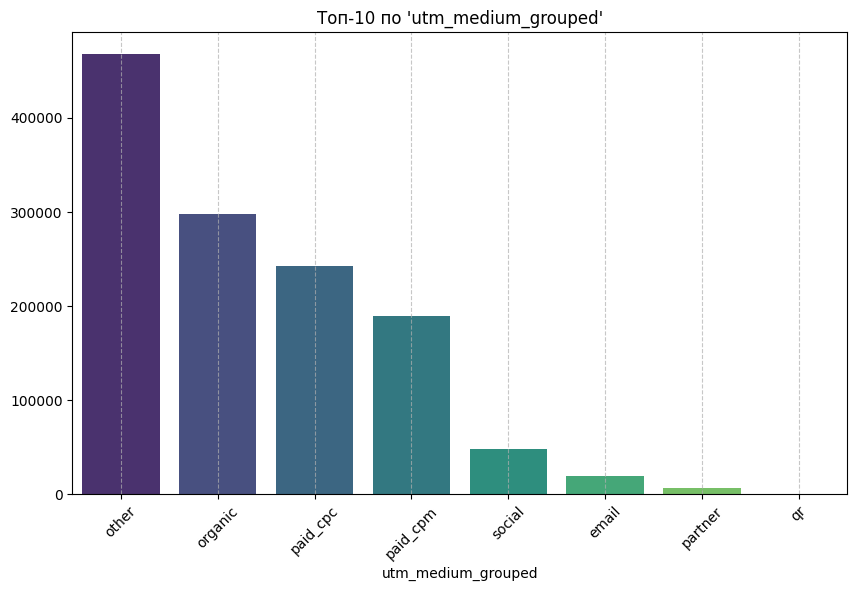

In [ ]:
plot_top_attributes(df, "utm_medium_grouped")

#### utm_source, utm_adcontent, utm_keyword и utm_campaign

In [ ]:
df['utm_campaign_encoded'] = top_encoder(df['utm_campaign'], 4, is_hash=True)
df['utm_source_encoded'] = top_encoder(df['utm_source'], 7, is_hash=True)
df['utm_adcontent_encoded'] = top_encoder(df['utm_adcontent'], 4, is_hash=True)
df['utm_keyword_encoded'] = top_encoder(df['utm_keyword'], 2, is_hash=True)
column_drop_list.extend(utm_column_list)

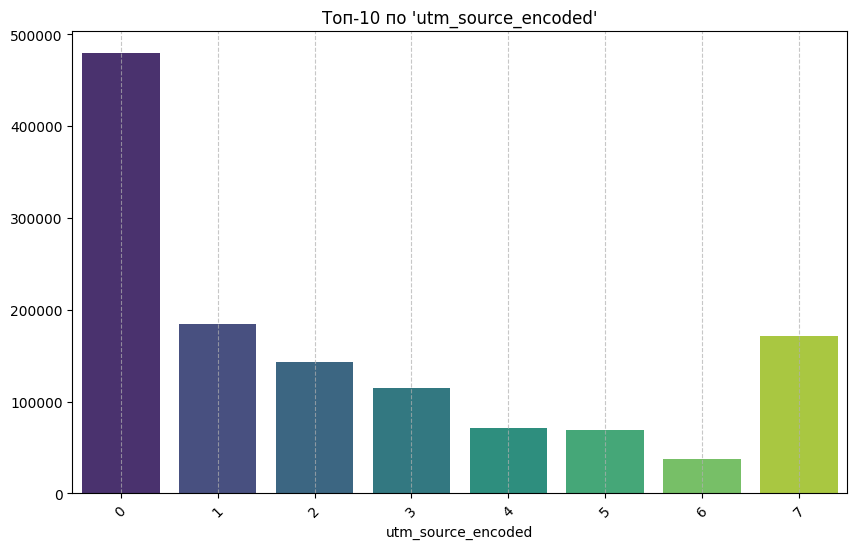

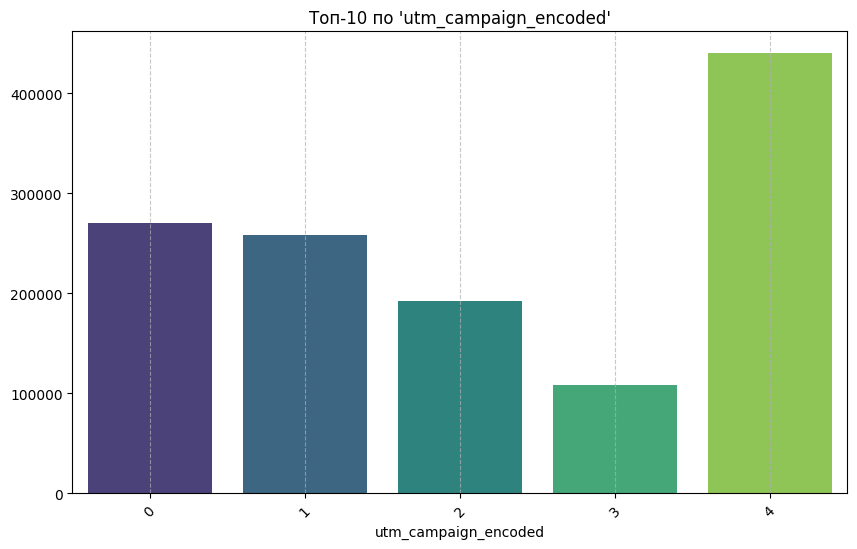

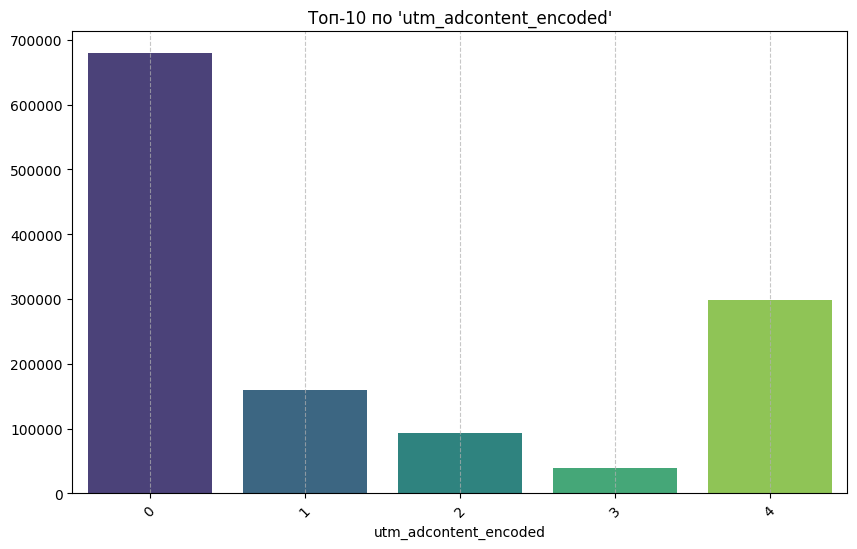

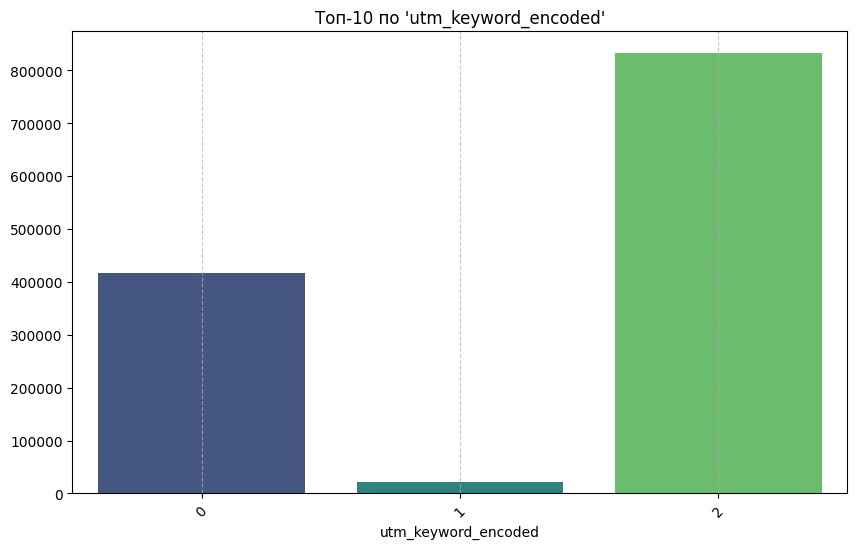

In [ ]:
for column in utm_column_list:
    try:
        plot_top_attributes(df, f'{column}_encoded')
    except:
        continue

### Обработка данных device

In [ ]:
device_column_list = get_columns_by_name(df, 'device')
device_column_list

['device_category',
 'device_os',
 'device_brand',
 'device_model',
 'device_screen_resolution',
 'device_browser']

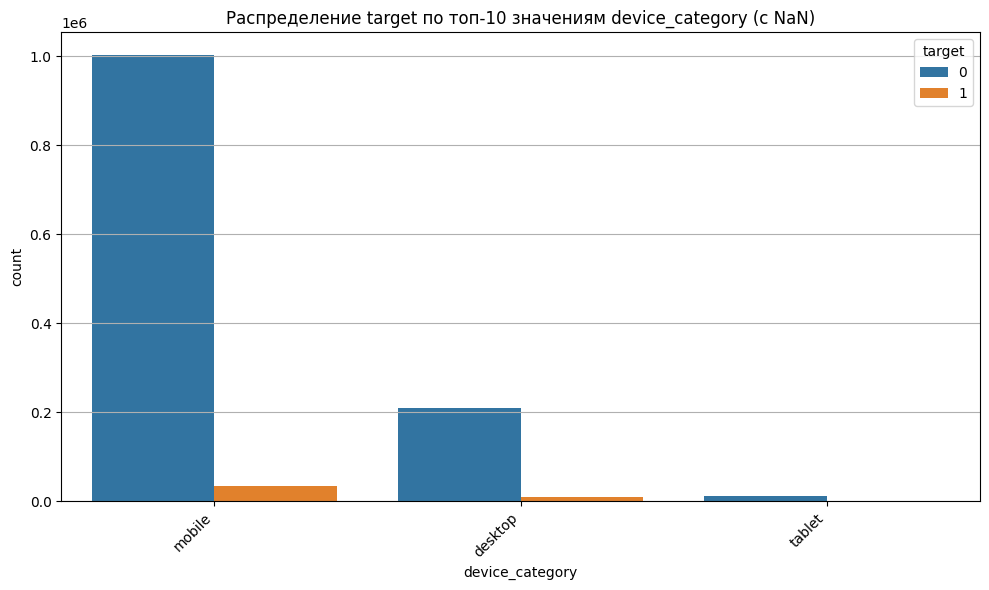

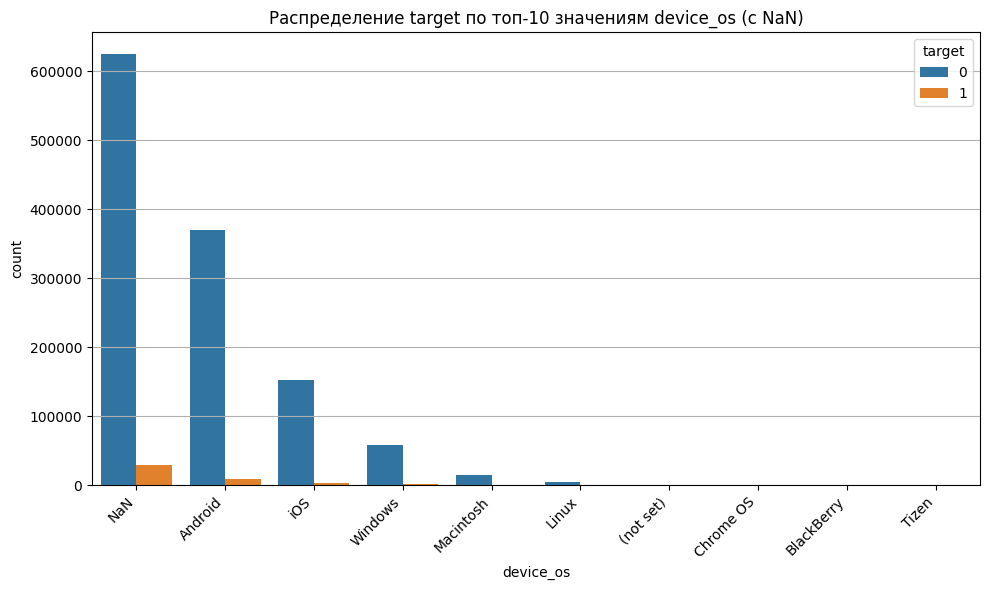

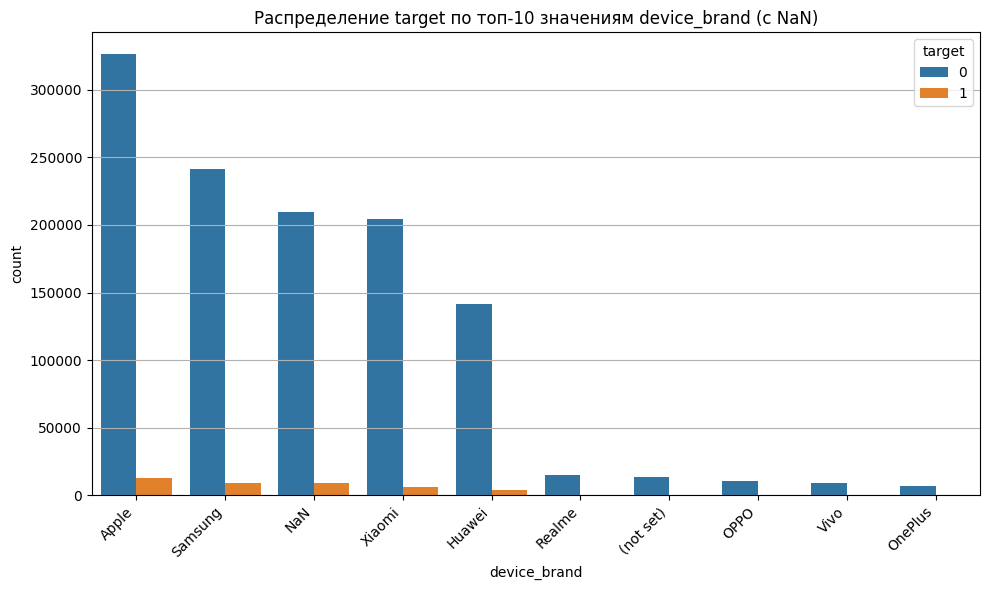

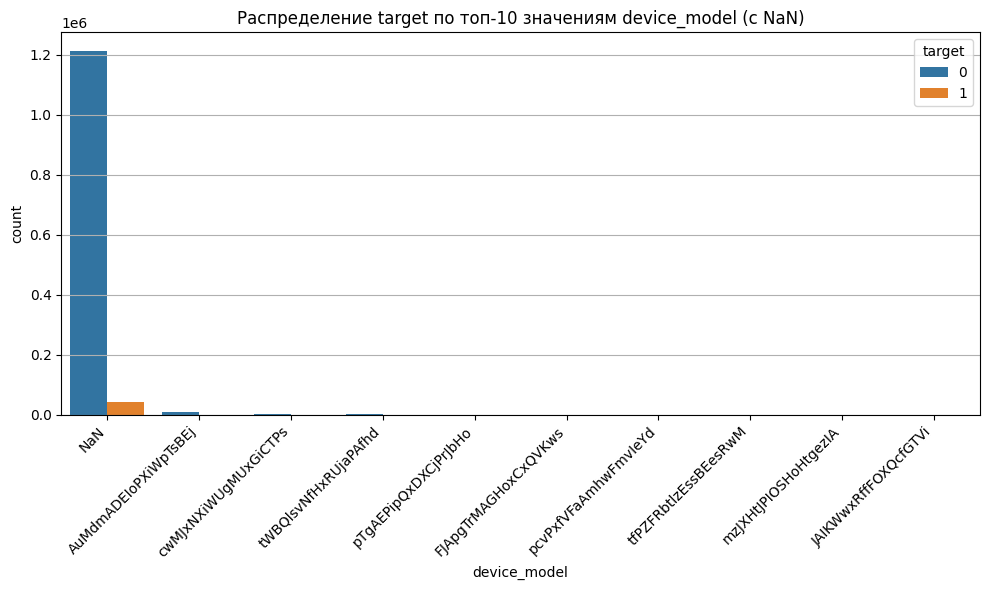

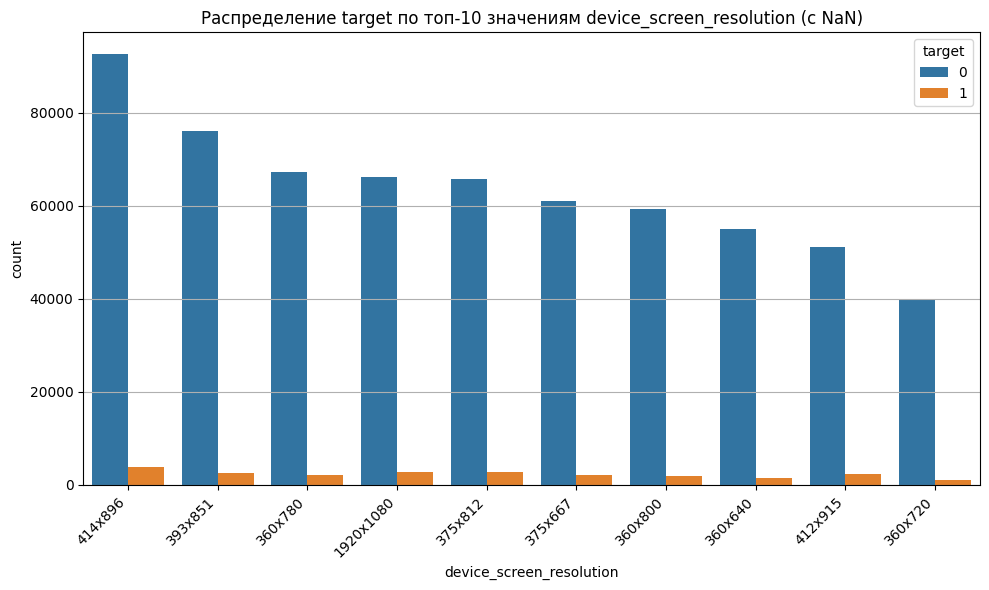

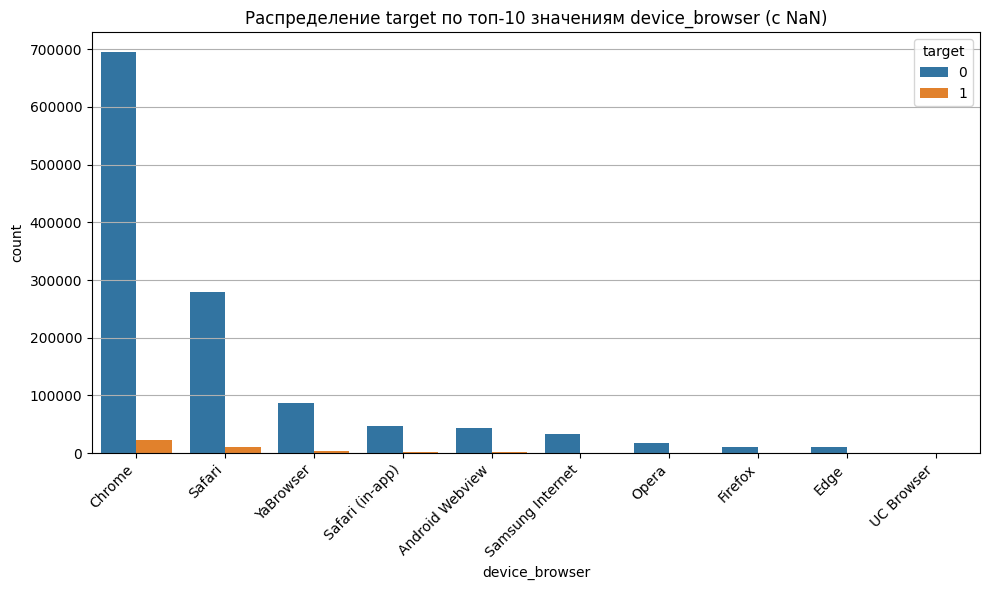

In [ ]:
for column in device_column_list:
    plot_top_categories_by_target(df, column, figsize=(10, 6))

У признака 'device_model' 98,9 % значний - пропуски. Данный признак подлежит удалению.

In [ ]:
df['device_category_encoded'] = top_encoder(df['device_category'], 3)
df['device_os_encoded'] = top_encoder(df['device_os'], 3)
df['device_brand_encoded'] = top_encoder(df['device_brand'], 4)
df['device_browser_encoded'] = top_encoder(df['device_browser'], 3)
df['device_screen_resolution_encoded'] = top_encoder(df['device_screen_resolution'], 4)
column_drop_list.extend(device_column_list)

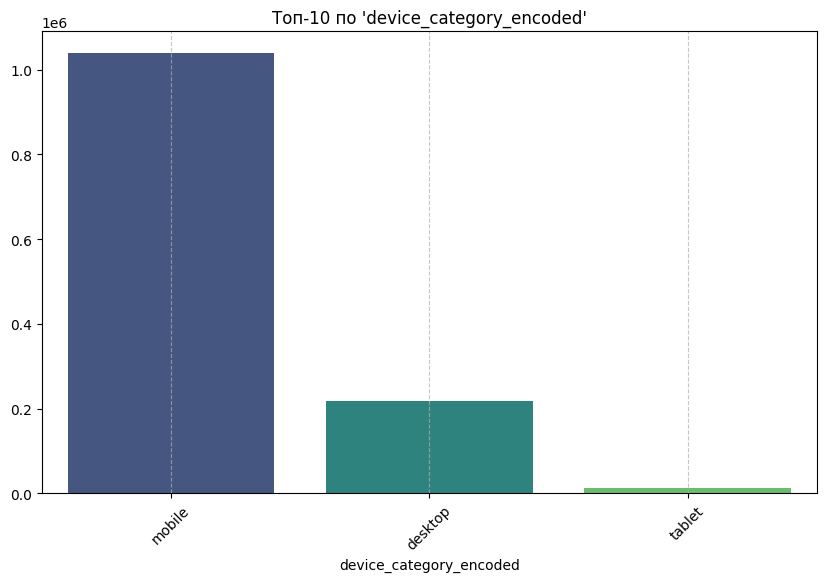

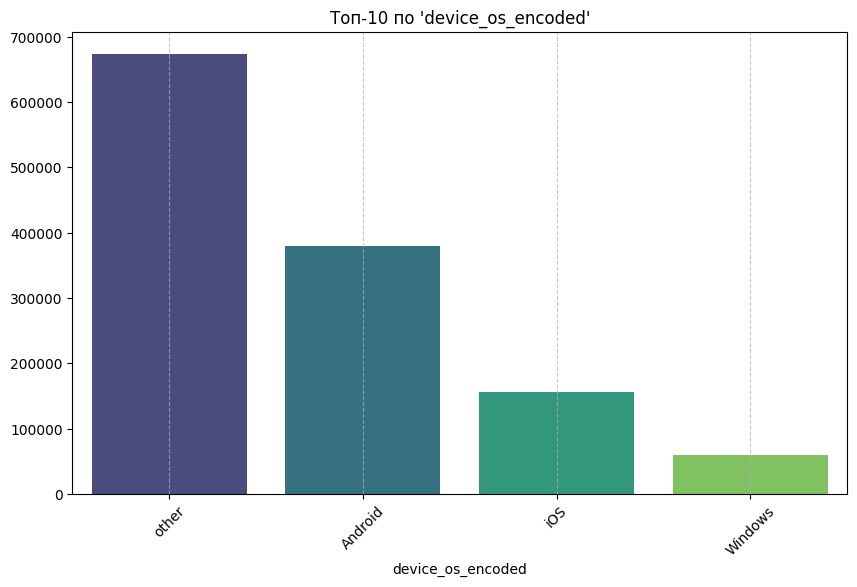

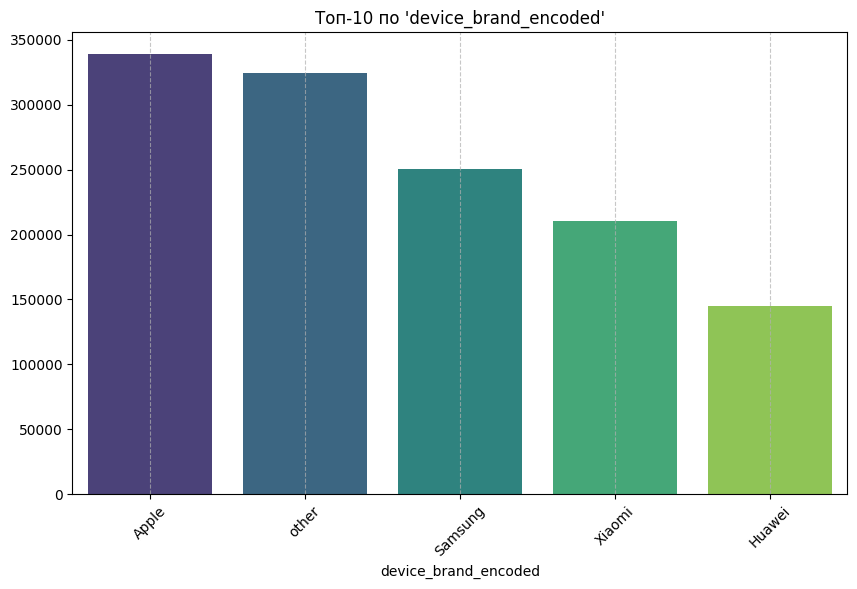

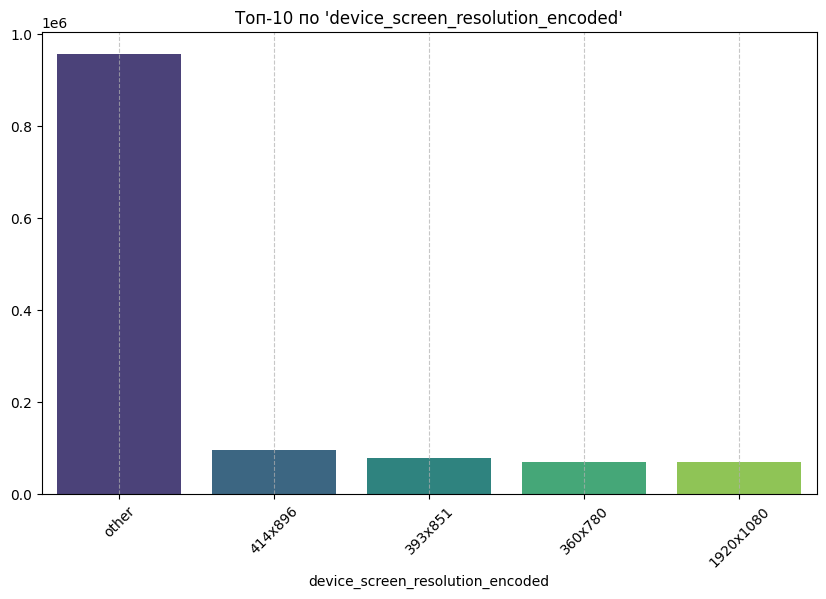

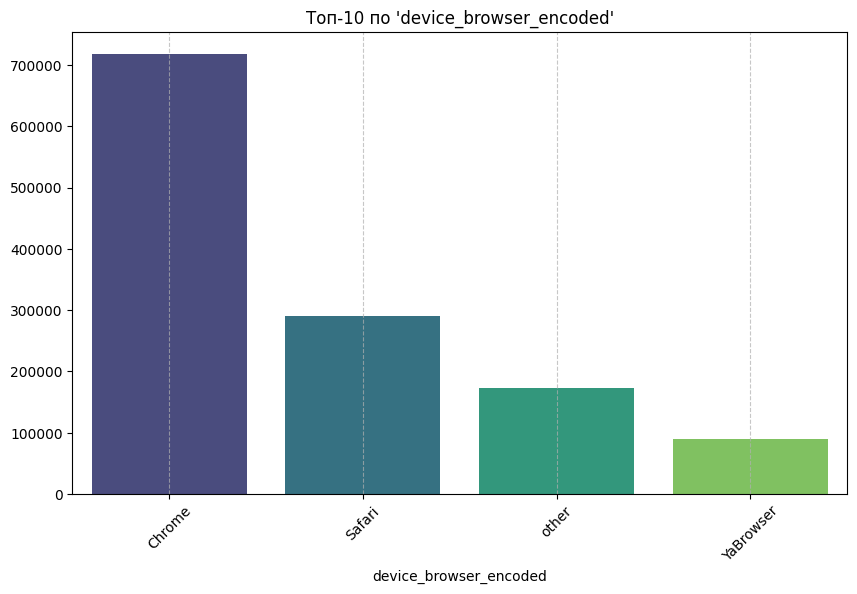

In [ ]:
for column in device_column_list:
    try:
        plot_top_attributes(df, f'{column}_encoded')
    except:
        continue

### Обработка geo

#### geo

**Страны по количеству визитов на сайт**

In [ ]:
# Датафрейм с распределением стран по количеству визитов на сайт
map_target = df.groupby('geo_country', as_index=False)['target'].value_counts().sort_values(by='count', ascending=False)
map_target.sample(5)

,geo_country,target,count
163,Paraguay,0,2
148,New Caledonia,0,1
118,Latvia,0,225
207,Taiwan,0,22
28,Bosnia & Herzegovina,0,5


In [ ]:
# Строим график
fig = px.choropleth(
    data_frame=map_target,
    locations="geo_country", # Столбец с локациями
    locationmode = "country names", # Режим сопоставления локаций с базой plotly
    color='count',
    animation_frame="target",
    title='По количеству удачных и неудачных визитов',
    range_color=[10, 10000], # Диапазон цетов
    width=1000, # Ширина
    height=700, # Высота
    color_continuous_scale=px.colors.sequential.Viridis # Палитра цветов
)
fig.show()

In [ ]:
geo_column_list = get_columns_by_name(df, 'geo')
geo_column_list

['geo_country', 'geo_city']

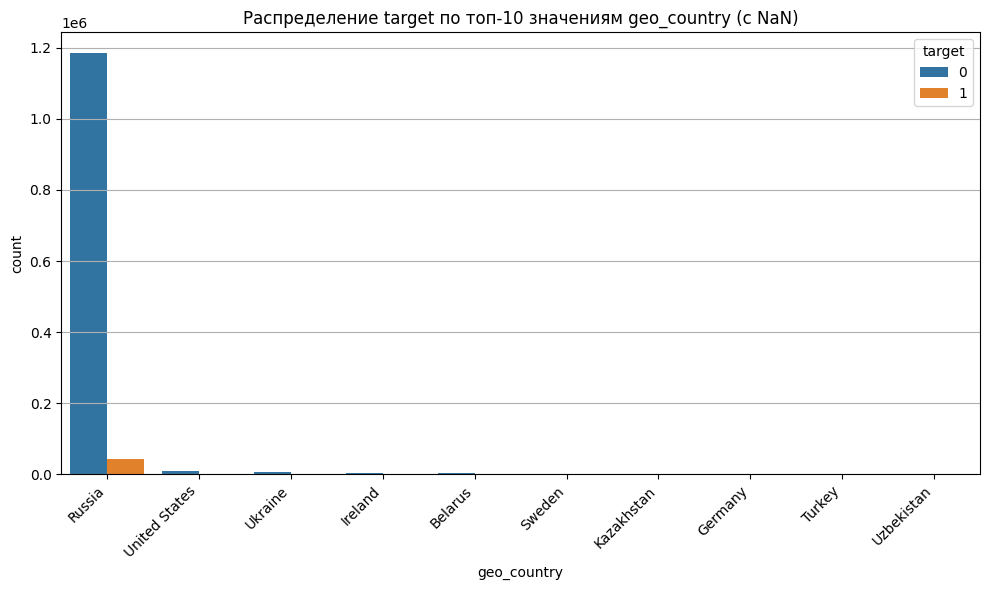

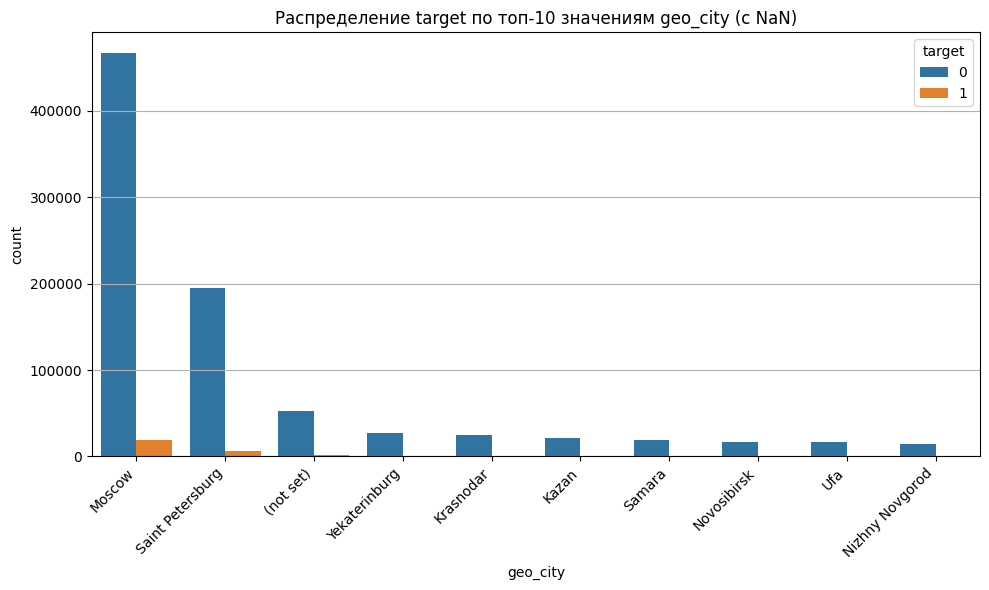

In [ ]:
for column in geo_column_list:
  plot_top_categories_by_target(df,column, top_n=10, figsize=(10, 6))

In [ ]:
df['geo_city_encoded'] = top_encoder(df['geo_city'], 2)
df['geo_country_encoded'] = top_encoder(df['geo_country'], 1)
column_drop_list.extend(geo_column_list)

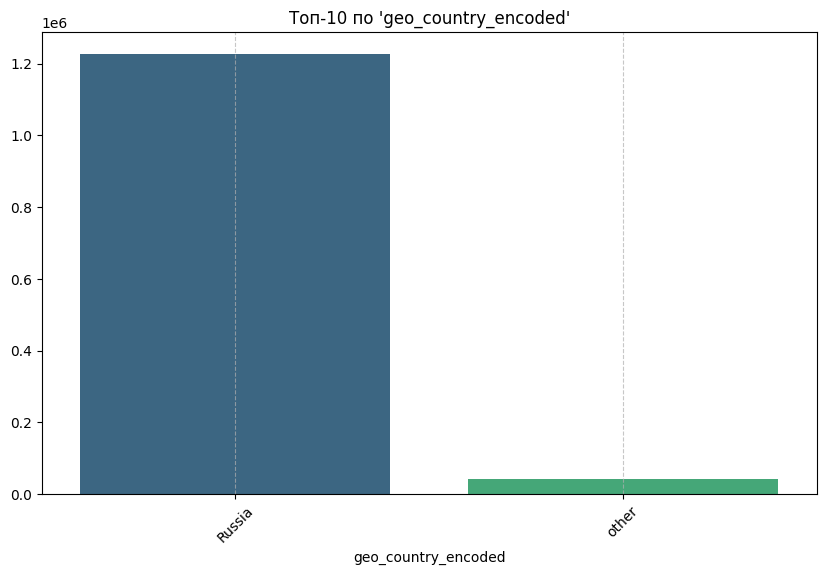

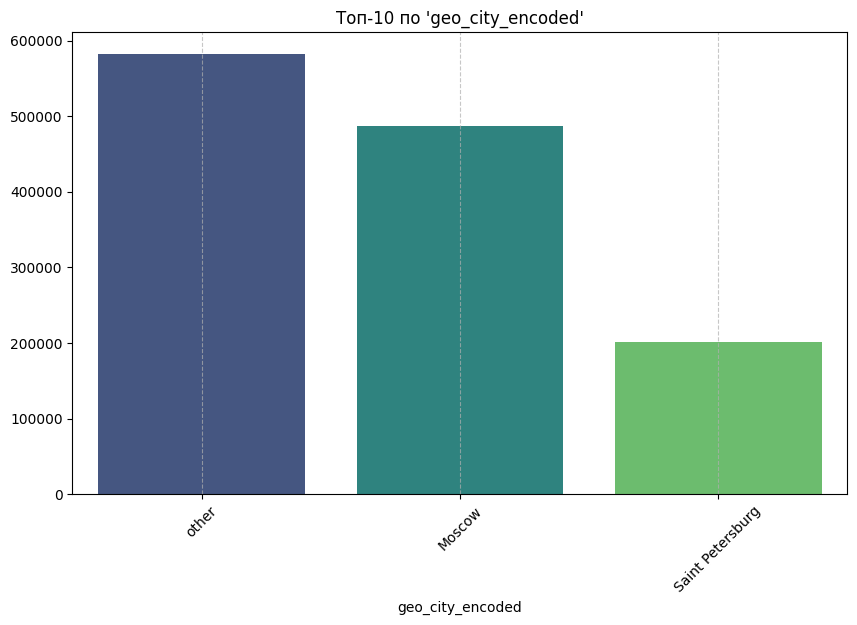

In [ ]:
for column in geo_column_list:
    try:
        plot_top_attributes(df, f'{column}_encoded')
    except:
        continue

### Обработка visit

### visit

In [ ]:
visit_column_list = get_columns_by_name(df, 'visit')
visit_column_list

['visit_date', 'visit_time', 'visit_number']

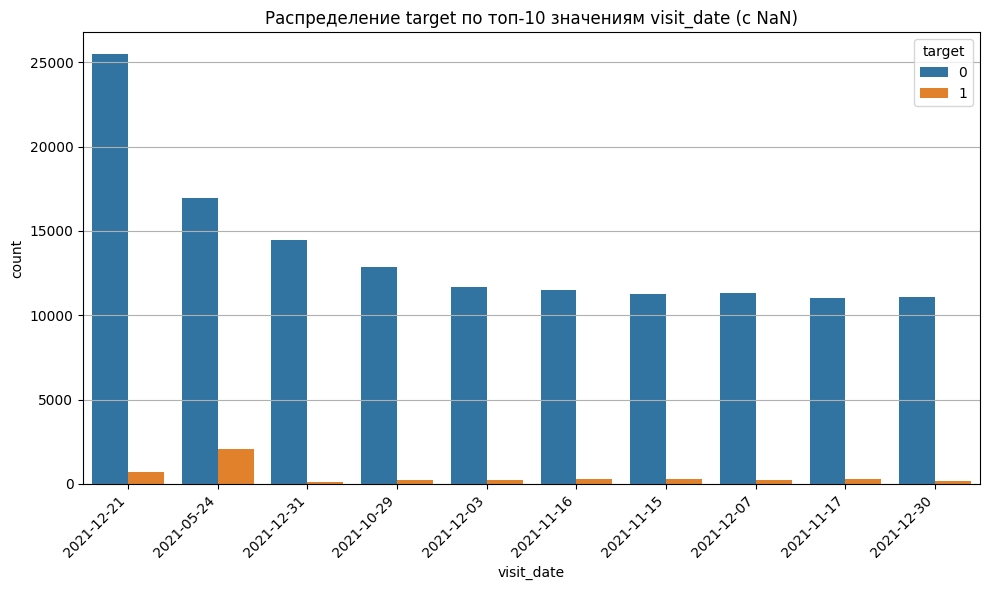

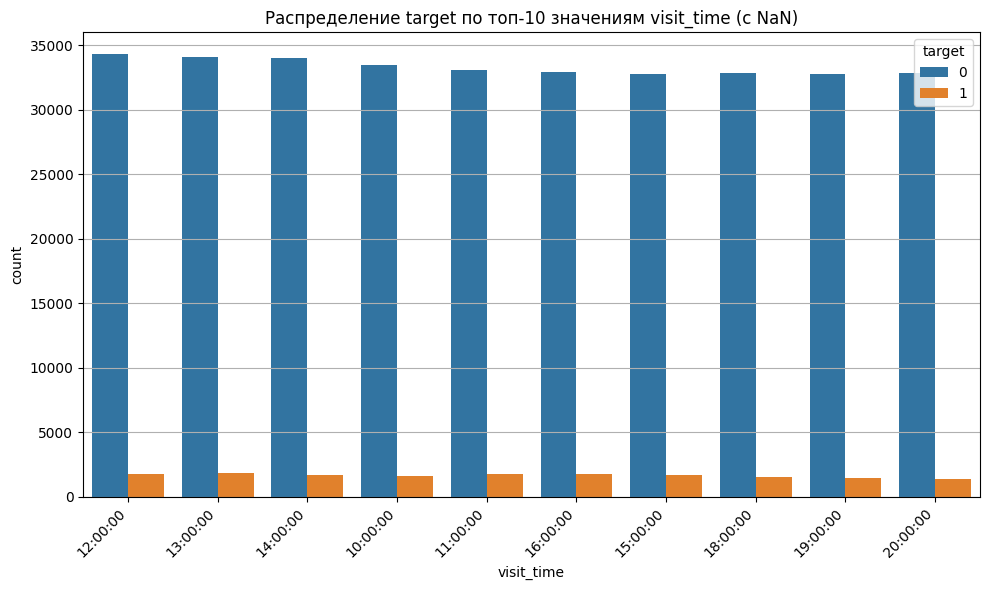

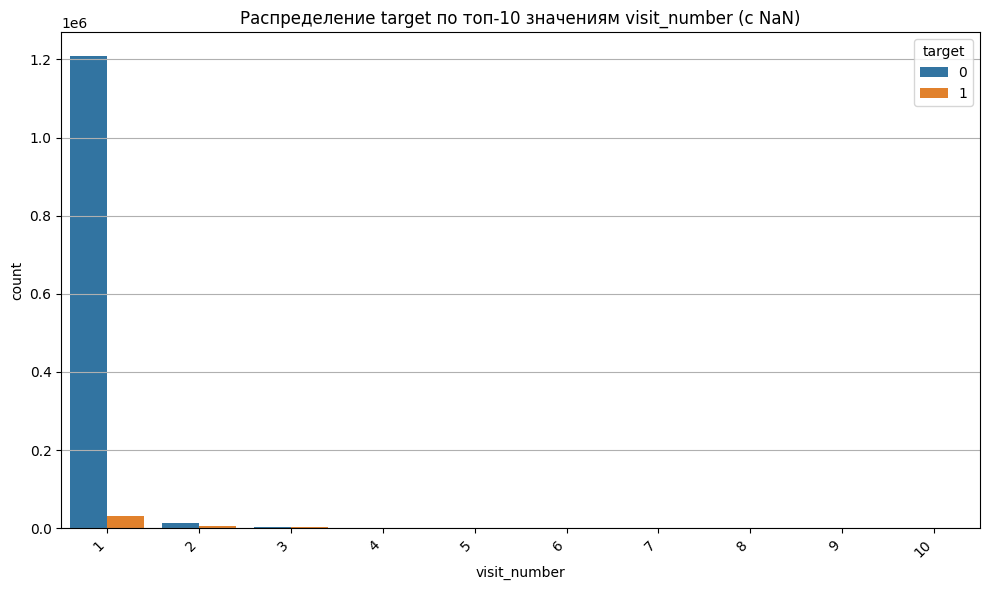

In [ ]:
for column in visit_column_list:
  plot_top_categories_by_target(df,column, top_n=10, figsize=(10, 6))

#### visit_time & visit_date

In [ ]:
def add_datetime_features(df, date_col, time_col):
    # Создание единого datetime
    df["datetime"] = pd.to_datetime(df[date_col] + " " + df[time_col])

    # День недели
    df["day_of_week"] = df["datetime"].dt.dayofweek  # 0=Понедельник, 6=Воскресенье
    df["is_weekend"] = df["day_of_week"].isin([5, 6]).astype(int)

    # Час
    df["hour"] = df["datetime"].dt.hour

    # Категории времени суток
    def time_of_day(hour):
        if 6 <= hour < 12:
            return "morning"
        elif 12 <= hour < 18:
            return "day"
        elif 18 <= hour < 24:
            return "evening"
        else:
            return "night"

    df["time_of_day"] = df["hour"].apply(time_of_day)

    # Сезон
    def season(month):
        if month in [12, 1, 2]:
            return "winter"
        elif month in [3, 4, 5]:
            return "spring"
        elif month in [6, 7, 8]:
            return "summer"
        else:
            return "autumn"

    df["month"] = df["datetime"].dt.month
    df["season"] = df["month"].apply(season)

    df.drop(['datetime', 'month', 'time_of_day', 'hour', 'day_of_week'], axis=1, inplace=True)

    return df, ['day_of_week', 'is_weekend', 'season']

In [ ]:
df, date_columns = add_datetime_features(df, "visit_date", "visit_time")
df

,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,...,utm_keyword_encoded,device_category_encoded,device_os_encoded,device_brand_encoded,device_browser_encoded,device_screen_resolution_encoded,geo_city_encoded,geo_country_encoded,is_weekend,season
0,2021-10-16,14:00:00,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,NaN,mobile,NaN,...,2,mobile,other,other,YaBrowser,other,Moscow,Russia,1,autumn
1,2021-05-25,10:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,...,2,mobile,other,Apple,Safari,other,Moscow,Russia,0,spring
2,2021-10-06,08:00:00,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,NaN,mobile,NaN,...,2,mobile,other,Huawei,YaBrowser,other,Saint Petersburg,Russia,0,autumn
3,2021-09-07,14:00:00,1,PlbkrSYoHuZBWfYjYnfw,cpm,FTjNLDyTrXaWYgZymFkV,TuyPWsGQruPMpKvRxeBF,NaN,desktop,NaN,...,2,desktop,other,other,Chrome,other,Moscow,Russia,0,autumn
4,2021-06-09,21:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,...,2,mobile,other,Samsung,other,other,other,Russia,0,summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269689,2021-09-07,11:00:00,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,PkybGvWbaqORmxjNunqZ,NaN,mobile,NaN,...,2,mobile,other,Xiaomi,Chrome,393x851,Moscow,Russia,0,autumn
1269690,2021-05-25,18:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,desktop,NaN,...,2,desktop,other,other,YaBrowser,1920x1080,Moscow,Russia,0,spring
1269691,2021-06-15,15:00:00,1,bByPQxmDaMXgpHeypKSM,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,desktop,NaN,...,2,desktop,other,other,Chrome,other,Moscow,Russia,0,summer
1269692,2021-10-03,12:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,...,2,mobile,other,Xiaomi,Chrome,393x851,other,Russia,1,autumn


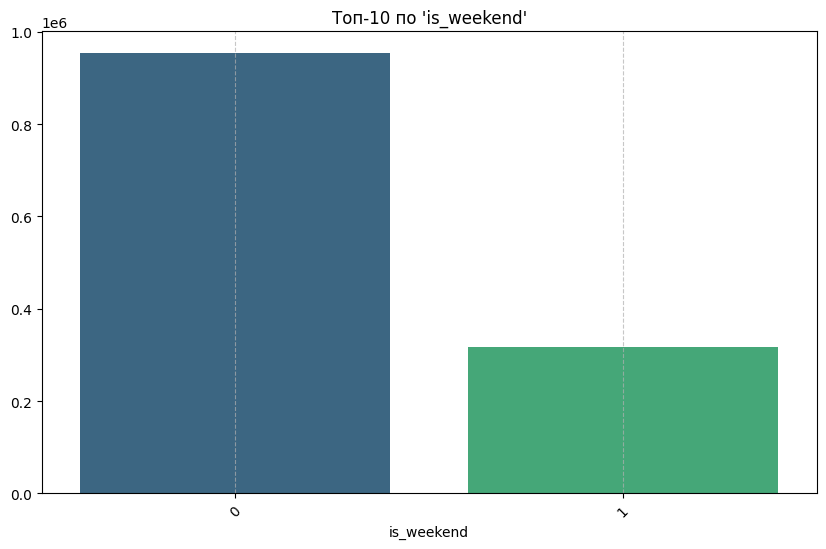

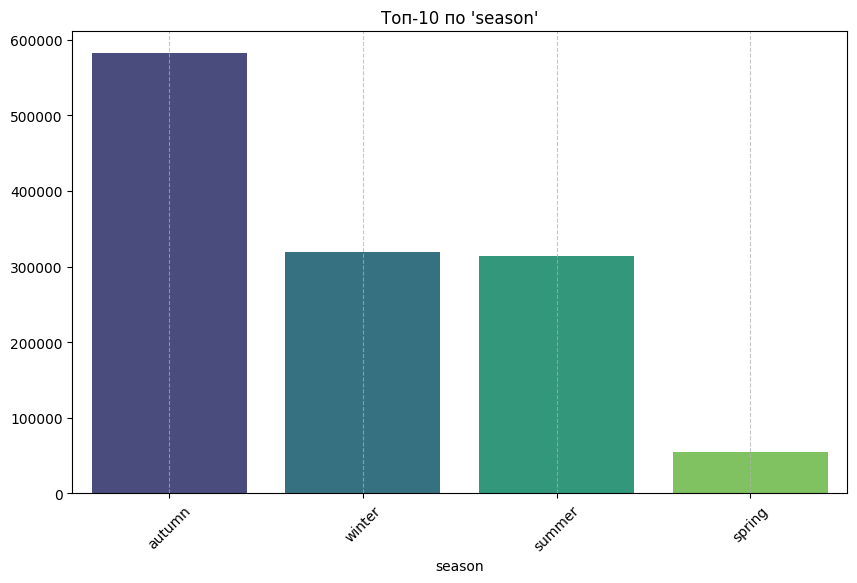

In [ ]:
for column in date_columns:
    try:
        plot_top_attributes(df, column)
    except:
        continue

In [ ]:
df['visit_number_encoded'] = top_encoder(df['visit_number'], 2)

In [ ]:
df['visit_number_encoded'].value_counts()

,count
visit_number_encoded,
1,1240656
2,18621
other,10417


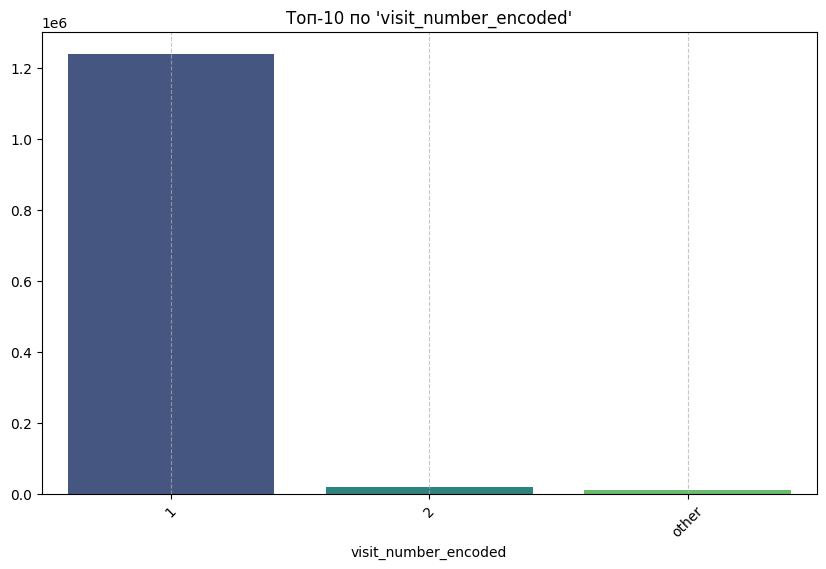

In [ ]:
plot_top_attributes(df, 'visit_number_encoded')

In [ ]:
column_drop_list.extend(visit_column_list)

# Анализ корреляционной матрицы признаков

In [ ]:
df = df.drop(columns=column_drop_list)

In [ ]:
df.columns


Index(['target', 'utm_medium_grouped', 'utm_campaign_encoded',
       'utm_source_encoded', 'utm_adcontent_encoded', 'utm_keyword_encoded',
       'device_category_encoded', 'device_os_encoded', 'device_brand_encoded',
       'device_browser_encoded', 'device_screen_resolution_encoded',
       'geo_city_encoded', 'geo_country_encoded', 'is_weekend', 'season',
       'visit_number_encoded'],
      dtype='object')

In [ ]:
df.shape

(1269694, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1269694 entries, 0 to 1269693
Data columns (total 16 columns):
 #   Column                            Non-Null Count    Dtype 
---  ------                            --------------    ----- 
 0   target                            1269694 non-null  int64 
 1   utm_medium_grouped                1269694 non-null  object
 2   utm_campaign_encoded              1269694 non-null  int64 
 3   utm_source_encoded                1269694 non-null  int64 
 4   utm_adcontent_encoded             1269694 non-null  int64 
 5   utm_keyword_encoded               1269694 non-null  int64 
 6   device_category_encoded           1269694 non-null  object
 7   device_os_encoded                 1269694 non-null  object
 8   device_brand_encoded              1269694 non-null  object
 9   device_browser_encoded            1269694 non-null  object
 10  device_screen_resolution_encoded  1269694 non-null  object
 11  geo_city_encoded                  1269694 non-null  obj

In [ ]:
#Функция выводит словарь датафрейма
def get_client_data(df, client_id):
    data = df.loc[client_id]
    return {col: data[col] for col in df.columns}

In [ ]:
# Пример использования:
result = get_client_data(df, 2)
result

{'target': np.int64(0),
 'utm_medium_grouped': 'paid_cpc',
 'utm_campaign_encoded': np.int64(4),
 'utm_source_encoded': np.int64(4),
 'utm_adcontent_encoded': np.int64(4),
 'utm_keyword_encoded': np.int64(2),
 'device_category_encoded': 'mobile',
 'device_os_encoded': 'other',
 'device_brand_encoded': 'Huawei',
 'device_browser_encoded': 'YaBrowser',
 'device_screen_resolution_encoded': 'other',
 'geo_city_encoded': 'Saint Petersburg',
 'geo_country_encoded': 'Russia',
 'is_weekend': np.int64(0),
 'season': 'autumn',
 'visit_number_encoded': 1}

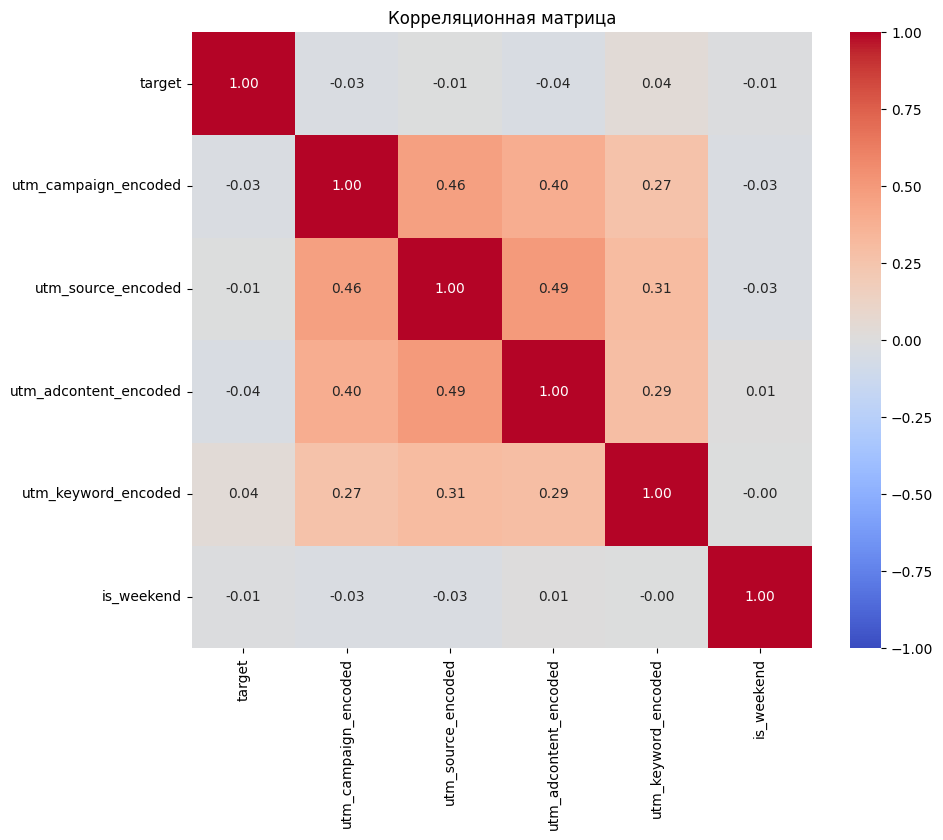

In [ ]:
# Оставляем только числовые признаки для корреляционной матрицы
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

corr_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляционная матрица')
plt.show()



**Анализ корреляционной матрицы признаков (на количественных признаках)**

В ходе анализа корреляционной матрицы между целевой переменной (**target**) и признаками получили следующие результаты:

- **Целевая переменная (target) не обнаруживает заметной корреляции** с числовыми признаками utm-меток и признаком is_weekend (корреляция по модулю во всех случаях ниже 0.05). Это свидетельствует о слабой линейной зависимости между целевой переменной и данными признаками, закодированными числовым способом.
- Наиболее высокую взаимную корреляцию демонстрируют признаки, отражающие параметры рекламных кампаний:  
  - utm_source_encoded и utm_adcontent_encoded — 0.49  
  - utm_source_encoded и utm_campaign_encoded — 0.46  
  - utm_campaign_encoded и utm_adcontent_encoded — 0.39  
  - utm_adcontent_encoded и utm_keyword_encoded — 0.29  
  - utm_campaign_encoded и utm_keyword_encoded — 0.26  
  Это свидетельствует о возможной взаимосвязи или перекрёстной информации между этими признаками (например, одна кампания может иметь ограниченный набор источников и содержимого рекламных объявлений или вариант рекламной кампании тянет за собой выбор источника и контента).
- Признак **is_weekend** не коррелирует ни с одним из используемых признаков (корреляции близки к нулю), что говорит о его независимости от других факторов.
- Все значения корреляции между target и признаками не превышают ±0.04, что говорит о *крайне слабой линейной зависимости*.  
  Это может указывать либо на отсутствие связи между выделенными признаками и целевой переменной, либо на нелинейный характер зависимости, либо на проблемы с методом кодирования категориальных признаков.

---

**Выводы:**

- В данных на текущем этапе анализа отсутствует выраженная линейная связь между исходными признаками (utm_campaign/source/adcontent/keyword, is_weekend) и целевой переменной.
- Значительная взаимная корреляция между признаками utm_* требует проверки на предмет избыточности информации (мультколлинеарности), либо рассмотрения более сложных способов их представления.
- Для дальнейшего анализа рекомендуется проверить другие методы кодирования категориальных признаков и рассмотреть построение более сложных или нелинейных моделей.

**Вычисление корреляции с учётом категориальных признаков**

In [ ]:
!pip install dython

,target,utm_medium_grouped,utm_campaign_encoded,utm_source_encoded,utm_adcontent_encoded,utm_keyword_encoded,device_category_encoded,device_os_encoded,device_brand_encoded,device_browser_encoded,device_screen_resolution_encoded,geo_city_encoded,geo_country_encoded,is_weekend,season,visit_number_encoded
target,1.000000,0.076777,-0.025473,-0.007304,-0.035058,0.038475,0.016925,0.057147,0.021138,0.019506,0.012814,0.025543,0.010208,-0.008564,0.083404,0.311559
utm_medium_grouped,0.076777,1.000000,0.667767,0.692085,0.708923,0.537118,0.263758,0.240083,0.184869,0.220375,0.123931,0.232517,0.108580,0.081077,0.250106,0.090848
utm_campaign_encoded,-0.025473,0.667767,1.000000,0.462273,0.395456,0.265511,0.105882,0.188978,0.086457,0.117339,0.069693,0.163643,0.029788,-0.029714,0.229767,0.009618
utm_source_encoded,-0.007304,0.692085,0.462273,1.000000,0.492521,0.307574,0.334341,0.275590,0.262518,0.337965,0.184018,0.152459,0.065285,-0.028404,0.160709,0.079741
utm_adcontent_encoded,-0.035058,0.708923,0.395456,0.492521,1.000000,0.292863,0.207410,0.120279,0.172040,0.171419,0.113653,0.217798,0.010735,0.007250,0.108658,0.009637
utm_keyword_encoded,0.038475,0.537118,0.265511,0.307574,0.292863,1.000000,0.166581,0.745504,0.135712,0.185515,0.096728,0.189770,0.015910,-0.001425,0.573831,0.031497
device_category_encoded,0.016925,0.263758,0.105882,0.334341,0.207410,0.166581,1.000000,0.406193,0.550807,0.146914,0.389654,0.032946,0.052166,0.076584,0.110607,0.041719
device_os_encoded,0.057147,0.240083,0.188978,0.275590,0.120279,0.745504,0.406193,1.000000,0.472338,0.378173,0.300331,0.087689,0.049570,0.042436,0.414631,0.036538
device_brand_encoded,0.021138,0.184869,0.086457,0.262518,0.172040,0.135712,0.550807,0.472338,1.000000,0.494507,0.472909,0.075548,0.055942,0.058586,0.082736,0.032516
device_browser_encoded,0.019506,0.220375,0.117339,0.337965,0.171419,0.185515,0.146914,0.378173,0.494507,1.000000,0.263661,0.076866,0.049794,0.014178,0.080819,0.028094


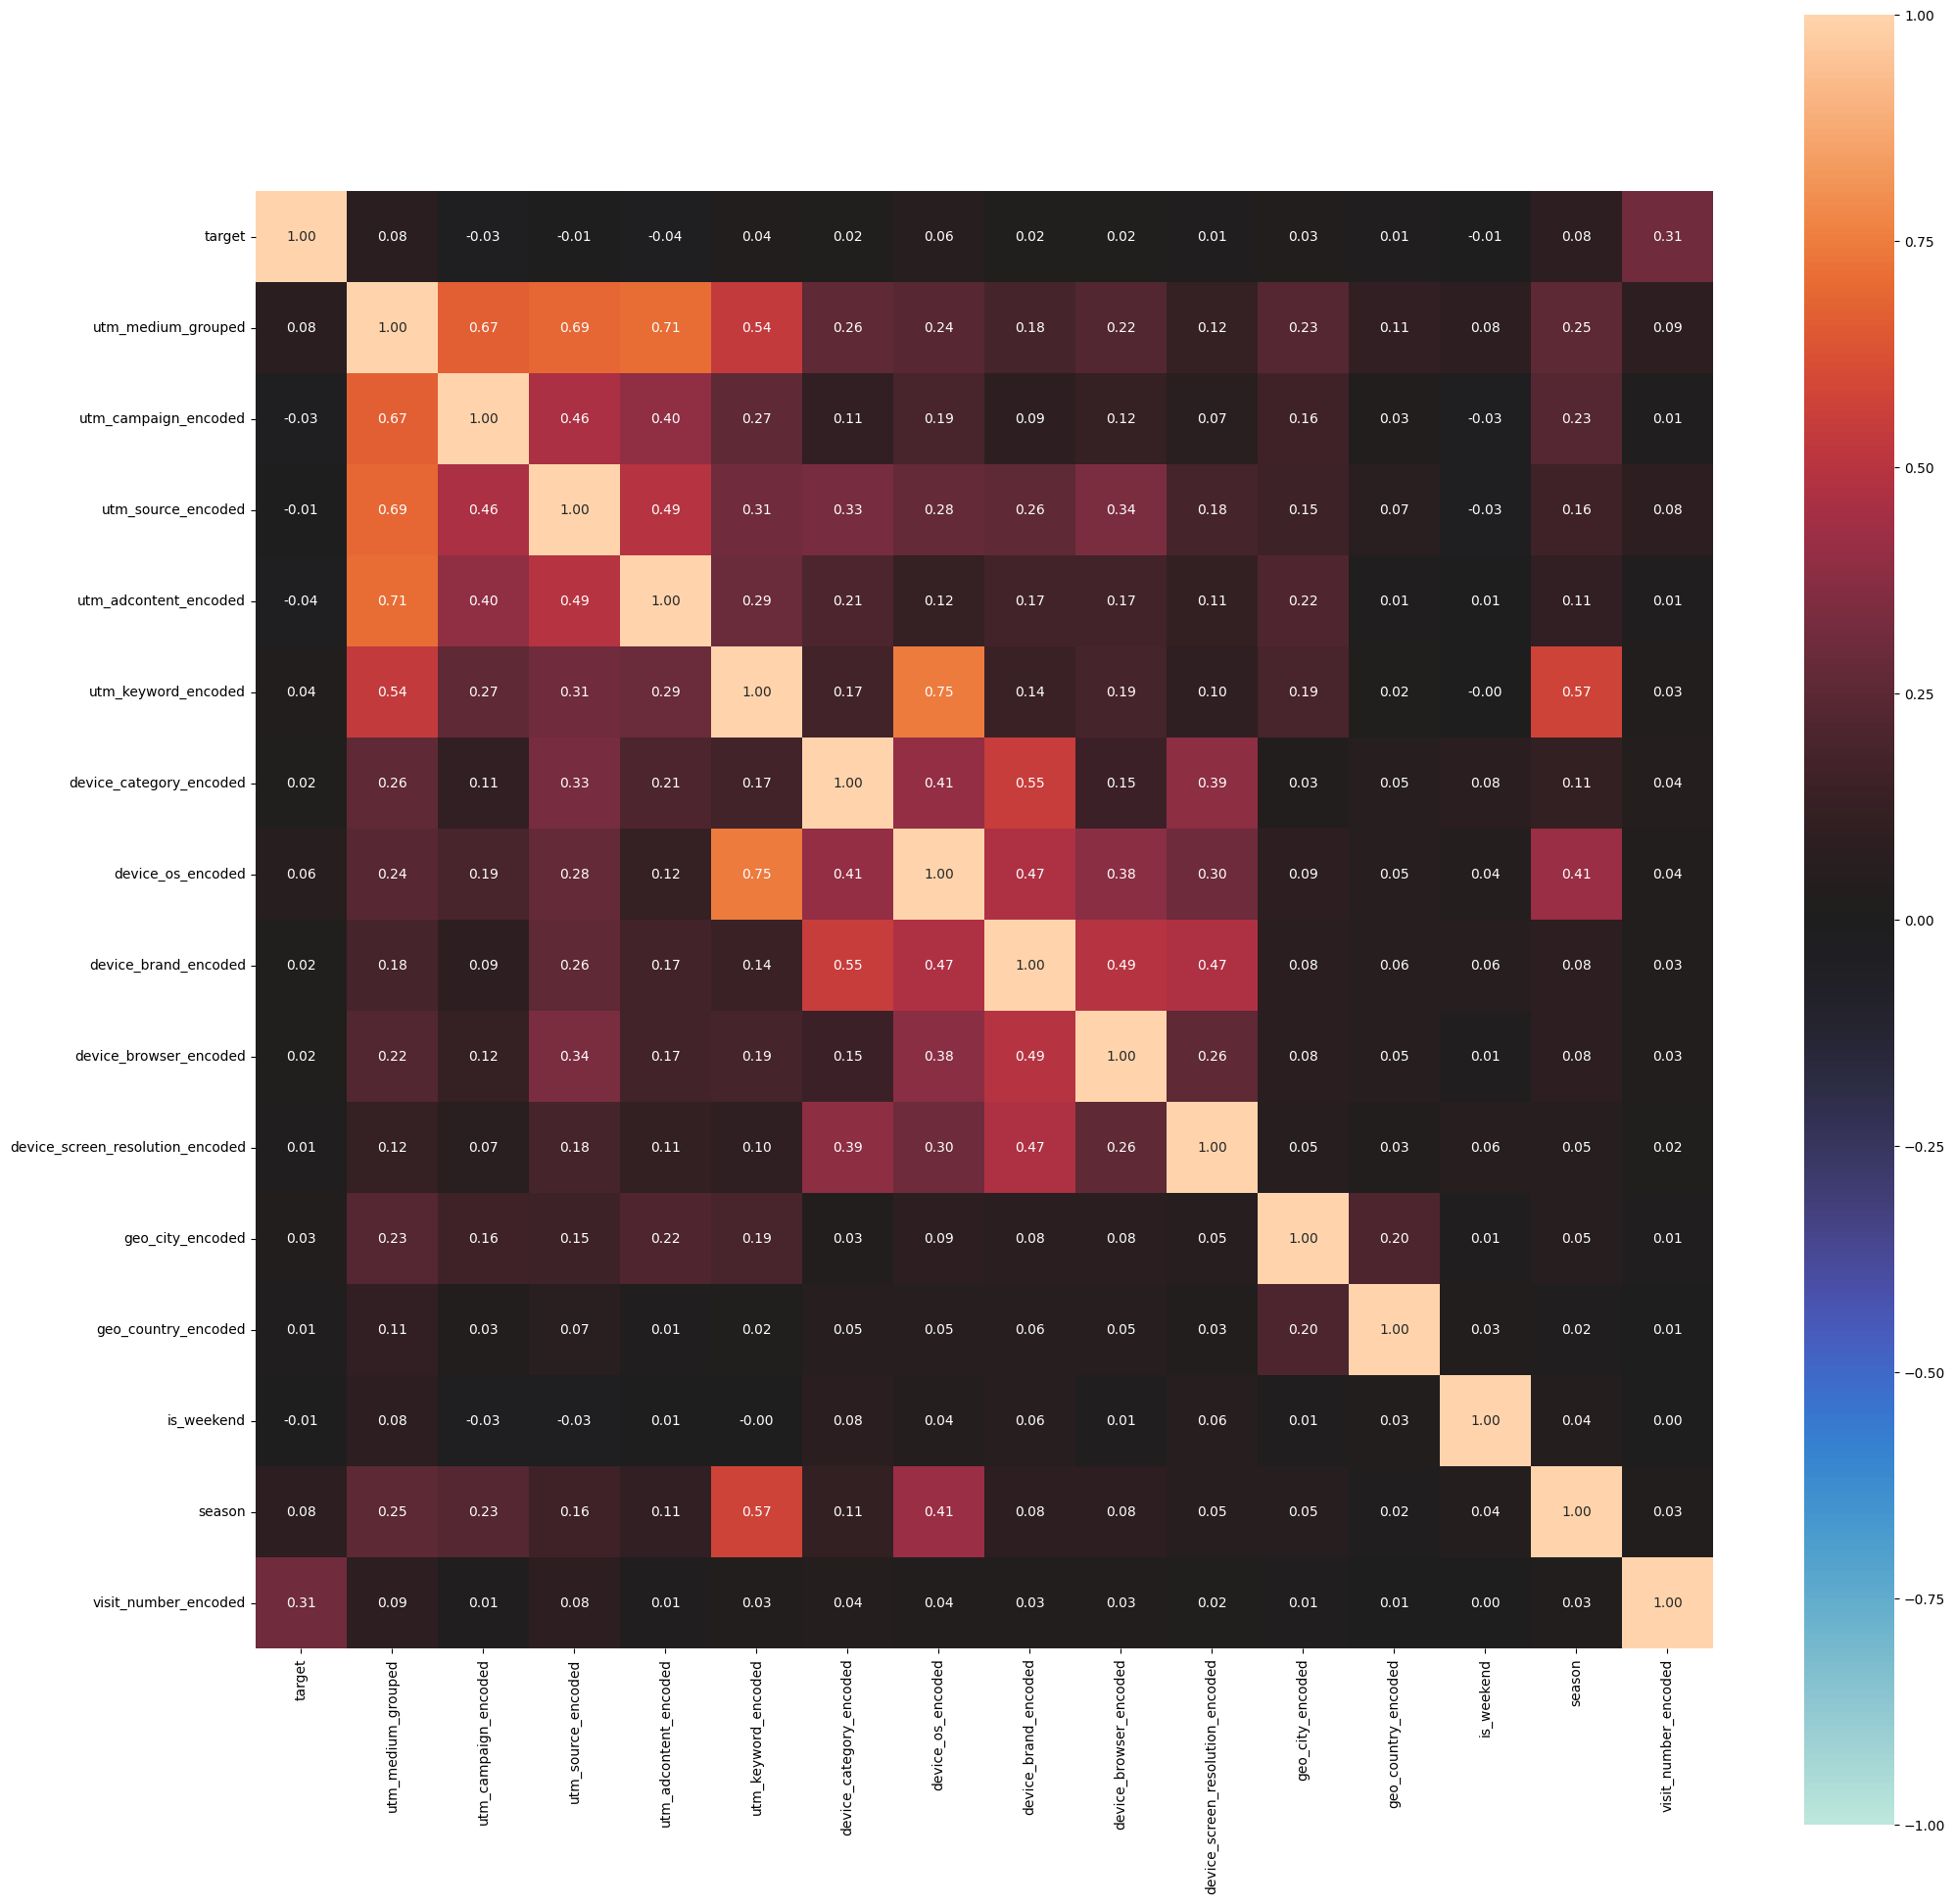

In [ ]:
from dython.nominal import associations

matrix = associations(
    df,
    nominal_columns='auto',
    plot=False
)['corr']

matrix

**Анализ корреляционной матрицы признаков (в том числе на категориальных признаков)**

1. **Отсутствие сильных корреляций с целевой переменной**  
   Значения корреляции между целевой переменной `target` и остальными признаками невысокие (максимальная — 0.31 с признаком `visit_number_encoded`). Это говорит о том, что ни один признак явно не определяет целевое значение, и влияние отдельных признаков ограничено.  
   **Значимые пары:**
   - `target` и `visit_number_encoded`: 0.31 — умеренно положительная связь; возможно, чем больше визитов, тем выше вероятность целевого действия.
   - `target` и `season`: 0.08  
   - Все остальные корреляции с `target` — ниже 0.08 по абсолютному значению (очень слабая связь).

2. **Взаимосвязи между категориальными признаками из одних и тех же групп**
   - Сильно коррелируют между собой переменные, связанные с UTM-метками (utm_medium, utm_campaign, utm_source, utm_adcontent, utm_keyword) — корреляция до 0.7, что логично, так как эти параметры часто бывают взаимосвязаны по маркетинговой логике.  
   - `utm_medium_grouped` имеет высокую корреляцию с `utm_campaign_encoded` (0.67), `utm_source_encoded` (0.69), `utm_adcontent_encoded` (0.71).
   - Это может говорить о наличии избыточных (мультиколлинеарных) признаков.

3. **Связи между признаками устройств**
   - `device_category_encoded`, `device_os_encoded`, `device_brand_encoded` взаимосвязаны (корреляция до 0.55 между `device_category_encoded` и `device_brand_encoded`, до 0.47 между другими парами).
   - Стоит учитывать возможную избыточность информации и, при необходимости, отобрать наиболее значимые.

4. **Признаки, практически не связанные ни с чем**
   - `is_weekend` практически не коррелирует ни с одной переменной, включая целевую (максимальная корреляция 0.08).
   - Признаки, связанные с географией (`geo_city_encoded`, `geo_country_encoded`) тоже демонстрируют низкую корреляцию с целевой переменной и другими признаками.

5. **Мультиколлинеарность**
   - В данных присутствуют группы сильно коррелированных между собой признаков (utm-метки, признаки устройства). При построении моделей желательно провести дополнительный отбор признаков или использовать методы, менее чувствительные к мультиколлинеарности (деревья решений, регуляризация и др.).


**Выводы:**

> Проведенный анализ корреляционной матрицы исходных признаков и целевой переменной. Выявлено, что целевая переменная слабо коррелирует с большинством изученных признаков. Наибольшее значение корреляции наблюдается с числом визитов пользователя (`visit_number_encoded`, 0.31). Значимые группы мультиколлинеарных признаков выявлены среди UTM-параметров и характеристик устройств, что может потребовать их отбора или трансформации для устойчивого обучения модели. Признаки, связанные с датой и географией, не демонстрируют выраженной связи ни с целевой переменной, ни между собой.

In [ ]:
df.columns


Index(['target', 'utm_medium_grouped', 'utm_campaign_encoded',
       'utm_source_encoded', 'utm_adcontent_encoded', 'utm_keyword_encoded',
       'device_category_encoded', 'device_os_encoded', 'device_brand_encoded',
       'device_browser_encoded', 'device_screen_resolution_encoded',
       'geo_city_encoded', 'geo_country_encoded', 'is_weekend', 'season',
       'visit_number_encoded'],
      dtype='object')

Таким образом, основываясь на выводах корреляционного анализа, необходимо удалить признаки 'utm_adcontent_encoded' и 'device_screen_resolution_encoded'.

In [ ]:
df = df.drop(['utm_adcontent_encoded', 'device_screen_resolution_encoded'], axis=1)

### Сохранение датасета

In [ ]:
df.to_csv(path + 'dataframe_for_learning.csv')

In [ ]:
df

,target,utm_medium_grouped,utm_campaign_encoded,utm_source_encoded,utm_keyword_encoded,device_category_encoded,device_os_encoded,device_brand_encoded,device_browser_encoded,geo_city_encoded,geo_country_encoded,is_weekend,season,visit_number_encoded
0,0,paid_cpc,4,4,2,mobile,other,other,YaBrowser,Moscow,Russia,1,autumn,1
1,0,organic,1,1,2,mobile,other,Apple,Safari,Moscow,Russia,0,spring,1
2,0,paid_cpc,4,4,2,mobile,other,Huawei,YaBrowser,Saint Petersburg,Russia,0,autumn,1
3,0,paid_cpm,2,7,2,desktop,other,other,Chrome,Moscow,Russia,0,autumn,1
4,0,organic,1,1,2,mobile,other,Samsung,other,other,Russia,0,summer,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269689,1,paid_cpm,2,2,2,mobile,other,Xiaomi,Chrome,Moscow,Russia,0,autumn,1
1269690,1,organic,1,1,2,desktop,other,other,YaBrowser,Moscow,Russia,0,spring,1
1269691,1,organic,1,5,2,desktop,other,other,Chrome,Moscow,Russia,0,summer,1
1269692,1,other,3,0,2,mobile,other,Xiaomi,Chrome,other,Russia,1,autumn,1
